In [1]:
import os
import csv
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# 9-11

In [13]:
directory = '/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/9_11_2001'
# List to store the graphs
graphs = []
# Iterate over files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    file = pd.read_csv(file_path)
    # Read the graph from the file (assuming CSV format)
    G = nx.from_pandas_edgelist(file, 'source', 'target', 'weight')
    graphs.append(G)

In [14]:
word_set = ['crash', 'collapse','catastrophe','fatality'
,'fight','attackings','aircraft','die','911','survive'
,'explode','rescue','collision'
,'destroy','terror','laden','twin', 'dead'
,'suicidal','traveler','skyscraper','terrorism','tower','hijack','bin','york']

In [15]:
dfs = []
# Iterate over each graph
for i, G in enumerate(graphs):
    # Create a dictionary to store SPL scores for the current graph
    spl_scores = {(word1, word2): -1 for word1 in word_set for word2 in word_set if word1 != word2}

    # Calculate SPL for each pair of words
    for word1 in word_set:
        for word2 in word_set:
            if word1 != word2:
                if word1 in G.nodes() and word2 in G.nodes():
                    try:
                        spl = nx.shortest_path_length(G, word1, word2)
                        spl_scores[(word1, word2)] = spl
                    except nx.NetworkXNoPath:
                        continue

    # Create a DataFrame for the graph's SPL scores
    df_graph = pd.DataFrame([spl_scores], columns=['Graph'] + list(spl_scores.keys()))
    df_graph['Graph'] = f'Graph {i+1}'

    # Append the graph's DataFrame to the list
    dfs.append(df_graph)

# Concatenate all graph-specific DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Save the DataFrame to a CSV file
df.to_csv('/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/11-9-new__-spl_scores.csv', index=False)


In [16]:
data_11_9 = pd.read_csv('/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/11-9-new__-spl_scores.csv')

In [16]:
# Transpose the DataFrame
df_transposed = data_11_9.transpose()
# Modify the DataFrame values to assign colors
df_colored = df_transposed.copy()
df_colored[df_colored == -1] = '<b>-1</b>'

# Create an interactive heatmap using Plotly Express
fig = px.imshow(df_colored.values,
                labels=dict(x="Graph Number", y="Word Pair"),
                x=df_colored.columns,
                y=df_colored.index)

fig.update_layout(title="Shortest Path Length (SPL) Scores Heatmap")

# Show the plot
fig.show()

In [17]:
pairs_of_interest = data_11_9.columns[1:10]  # Assuming the first column is 'Graph Number'

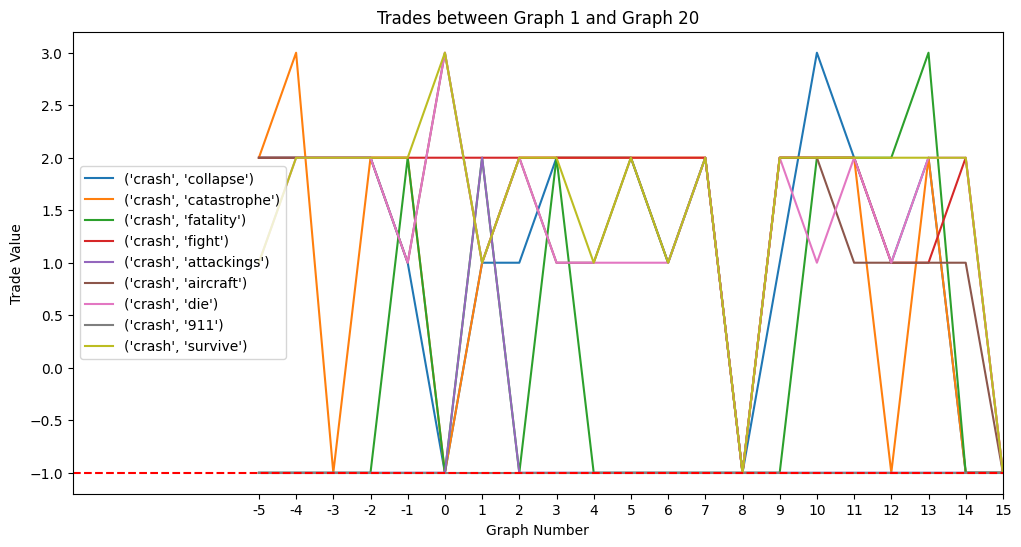

In [18]:
# Subset the DataFrame to include only the selected pairs and the trades from graph 1 to graph 20
subset_df = data_11_9[['Graph'] + list(pairs_of_interest)].iloc[:21]

# Set the graph number as the x-axis values
x = subset_df['Graph']
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each pair as a separate line
for pair in pairs_of_interest:
    plt.plot(x, subset_df[pair], label=pair)
# Set the title and labels for the plot
plt.title('Trades between Graph 1 and Graph 20')
plt.xlabel('Graph Number')
plt.ylabel('Trade Value')
# Set the x-axis ticks and labels
plt.xticks(range(21), range(-5, 16))  # Set the x-axis ticks and labels as -5, -4, ..., 14, 15
plt.xlim(-5, 20)  # Set the x-axis limits to -5 and 15
plt.axhline(y=-1, color='red', linestyle='--')
# Add a legend to the plot
plt.legend()


# Display the plot
plt.show()

In [10]:
def plot_pairs(values,title):
    # Set the x-axis values as a range of integers
    x = range(len(data_11_9))
    # Get the values from the column "('crash', 'traveler')"
    # Plot the values
    plt.scatter(x, values)
    plt.plot(x, values, linestyle='-', color='lightpink')
    plt.title(title)
    plt.xlabel("Graph Number")
    plt.ylabel("Value")
    # Set the x-axis ticks and labels
    plt.xticks(range(len(data_11_9)), range(-5, 16))  # Set the x-axis ticks and labels as -5, -4, ..., 14, 15
    plt.xlim(0, len(data_11_9)-1)  # Set the x-axis limits to include the first and last data points
    # Add a horizontal line at y = -1
    plt.axhline(y=-1, color='red', linestyle='--')
    plt.axvline(x=5, color='red', linestyle='--')
    # Display the plot
    plt.show()

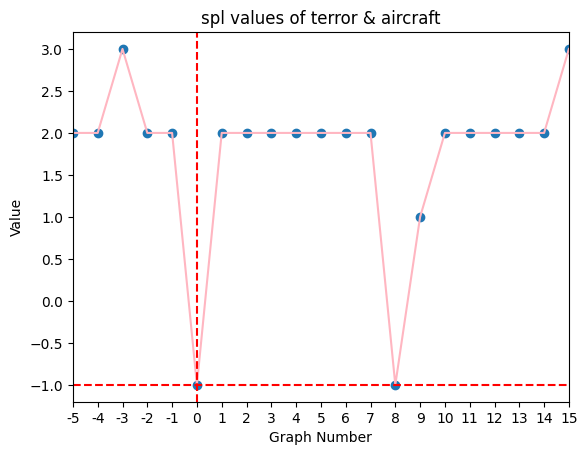

In [30]:
plot_pairs(data_11_9["('terror', 'aircraft')"].values,'spl values of terror & aircraft')

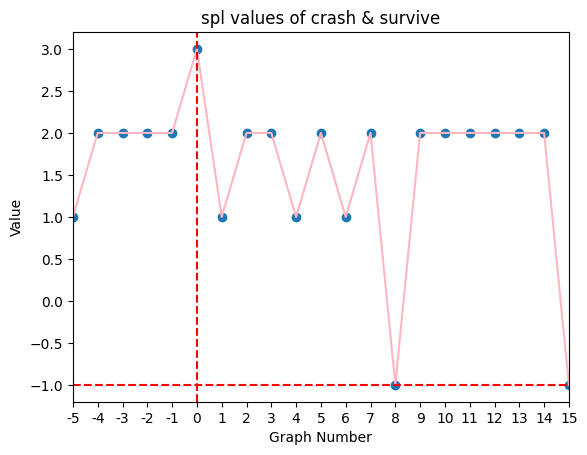

In [21]:
plot_pairs(data_11_9["('crash', 'survive')"].values,'spl values of crash & survive')

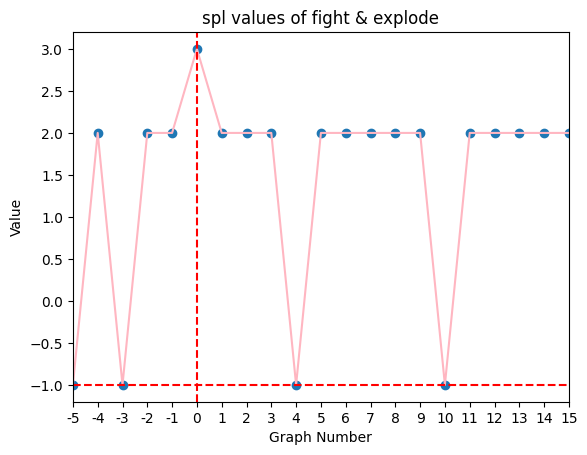

In [23]:
plot_pairs(data_11_9["('fight', 'explode')"].values,'spl values of fight & explode')

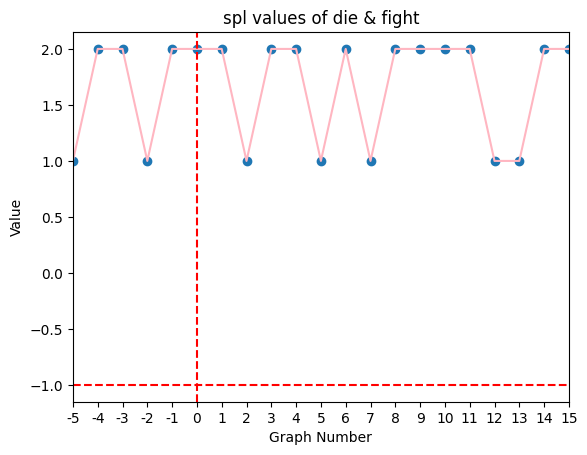

In [24]:
plot_pairs(data_11_9["('fight', 'die')"].values,'spl values of die & fight')

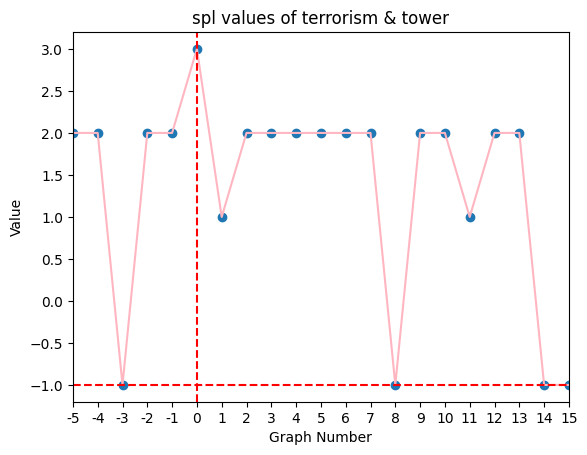

In [26]:
plot_pairs(data_11_9["('terrorism', 'tower')"].values,'spl values of terrorism & tower')

# Boston

In [31]:
directory = '/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/boston_15_04_2013'
# List to store the graphs
graphs_boston = []
# Iterate over files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    file = pd.read_csv(file_path)
    # Read the graph from the file (assuming CSV format)
    G = nx.from_pandas_edgelist(file, 'source', 'target', 'weight')
    graphs_boston.append(G)

In [36]:
word_set_boston=['bomb','bombing','marathoner','marathon','terroristic','terrorism','terror','suspect','kill','injure','car',
                 'kidnap','shooting', 'steal','terrorist']

In [38]:
dfs_boston = []
# Iterate over each graph
for i, G in enumerate(graphs_boston):
    # Create a dictionary to store SPL scores for the current graph
    spl_scores = {(word1, word2): -1 for word1 in word_set_boston for word2 in word_set_boston if word1 != word2}
    # Calculate SPL for each pair of words
    for word1 in word_set_boston:
        for word2 in word_set_boston:
            if word1 != word2:
                if word1 in G.nodes() and word2 in G.nodes():
                    try:
                        spl = nx.shortest_path_length(G, word1, word2)
                        spl_scores[(word1, word2)] = spl
                    except nx.NetworkXNoPath:
                        continue

    # Create a DataFrame for the graph's SPL scores
    df_graph = pd.DataFrame([spl_scores], columns=['Graph'] + list(spl_scores.keys()))
    df_graph['Graph'] = f'Graph {i+1}'

    # Append the graph's DataFrame to the list
    dfs_boston.append(df_graph)

# Concatenate all graph-specific DataFrames into a single DataFrame
df_boston = pd.concat(dfs_boston, ignore_index=True)

# Save the DataFrame to a CSV file
df_boston.to_csv('/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/spl_scores_boston.csv', index=False)

In [42]:
data_boston = pd.read_csv('/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/spl_scores_boston.csv')

In [11]:
def plot_pairs_(values,title):
   # Set the x-axis values as a range of integers
    x = range(-4, 16)
    # Get the values from the column "('crash', 'traveler')"
    # Plot the values as a scatter plot
    plt.scatter(x, values, color='lightblue')
    # Plot a line connecting the scatter plot points
    plt.plot(x, values, linestyle='-', color='lightpink')

    plt.title(title)
    plt.xlabel("Graph Number")
    plt.ylabel("Value")

    # Set the x-axis ticks and labels
    plt.xticks(range(-4, 16))
    plt.xlim(-4, 15)  # Set the x-axis limits

    # Add a horizontal line at y = -1
    plt.axhline(y=-1, color='red', linestyle='--')
    # Add a vertical line at x = 0
    plt.axvline(x=0, color='red', linestyle='--')

    # Display the plot
    plt.show()

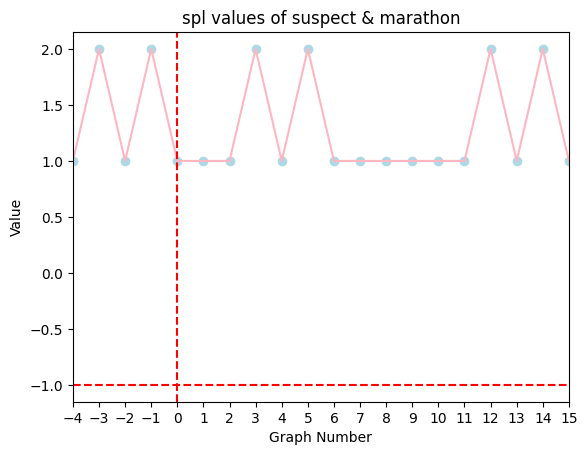

In [44]:
plot_pairs_(data_boston["('suspect', 'marathon')"].values,'spl values of suspect & marathon')

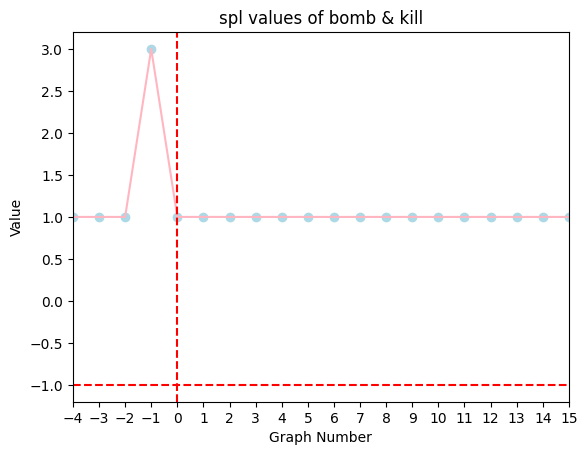

In [45]:
plot_pairs_(data_boston["('bomb', 'kill')"].values,'spl values of bomb & kill')

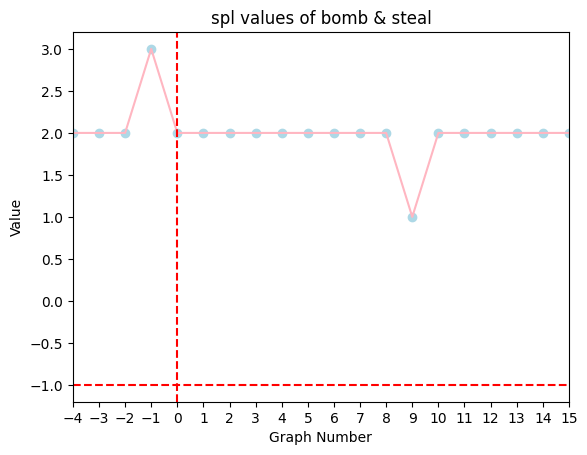

In [46]:
plot_pairs_(data_boston["('bomb', 'steal')"].values,'spl values of bomb & steal')

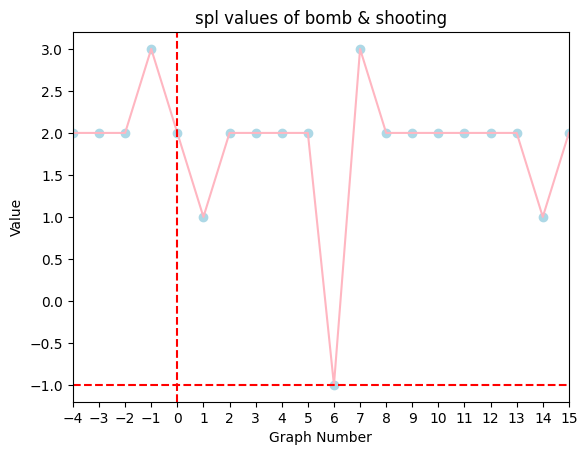

In [47]:
plot_pairs_(data_boston["('shooting', 'bomb')"].values,'spl values of bomb & shooting')

# Binladin

creating all the graphs

In [4]:
directory = '/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/binladin_02_05_2011'
# List to store the graphs
graphs_binladen = []
# Iterate over files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    file = pd.read_csv(file_path)
    # Read the graph from the file (assuming CSV format)
    G = nx.from_pandas_edgelist(file, 'source', 'target', 'weight')
    graphs_binladen.append(G)

In [5]:
word_set_binladen=['bomb','killing','injure','bombing','airborne','terrorize','militant','compound','operationally',
                   'operation','cia','','islamic']

In [7]:
dfs_bin_laden = []
# Iterate over each graph
for i, G in enumerate(graphs_binladen):
    # Create a dictionary to store SPL scores for the current graph
    spl_scores = {(word1, word2): -1 for word1 in word_set_binladen for word2 in word_set_binladen if word1 != word2}
    # Calculate SPL for each pair of words
    for word1 in word_set_binladen:
        for word2 in word_set_binladen:
            if word1 != word2:
                if word1 in G.nodes() and word2 in G.nodes():
                    try:
                        spl = nx.shortest_path_length(G, word1, word2)
                        spl_scores[(word1, word2)] = spl
                    except nx.NetworkXNoPath:
                        continue

    # Create a DataFrame for the graph's SPL scores
    df_graph = pd.DataFrame([spl_scores], columns=['Graph'] + list(spl_scores.keys()))
    df_graph['Graph'] = f'Graph {i+1}'

    # Append the graph's DataFrame to the list
    dfs_bin_laden.append(df_graph)

# Concatenate all graph-specific DataFrames into a single DataFrame
dfs_bin_laden = pd.concat(dfs_bin_laden, ignore_index=True)

# Save the DataFrame to a CSV file
dfs_bin_laden.to_csv('/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/spl_scores_bin_laden.csv', index=False)

In [17]:
data_bin_laden = pd.read_csv('/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/spl_scores_bin_laden.csv')

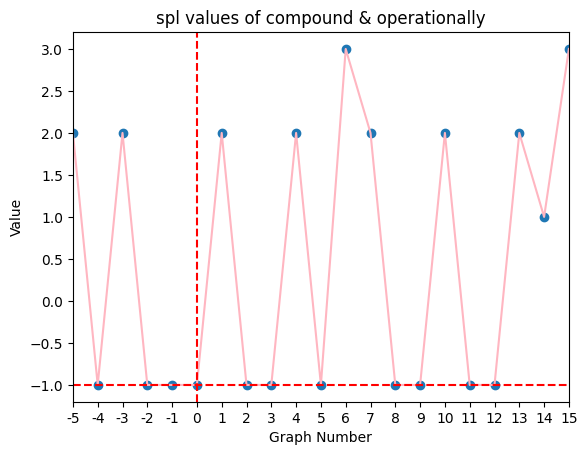

In [18]:
plot_pairs(data_bin_laden["('compound', 'operationally')"].values,'spl values of compound & operationally')

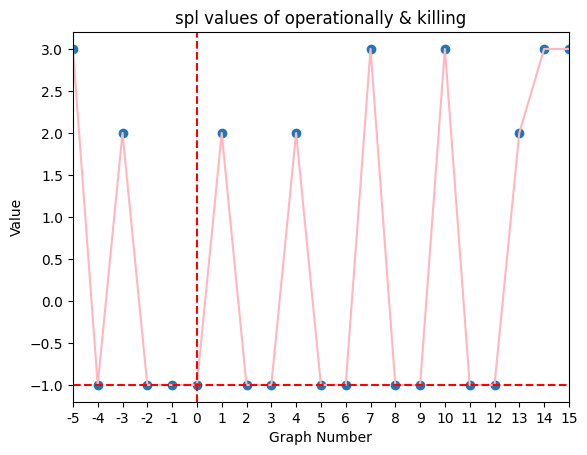

In [22]:
plot_pairs(data_bin_laden["('operationally', 'killing')"].values,'spl values of operationally & killing')

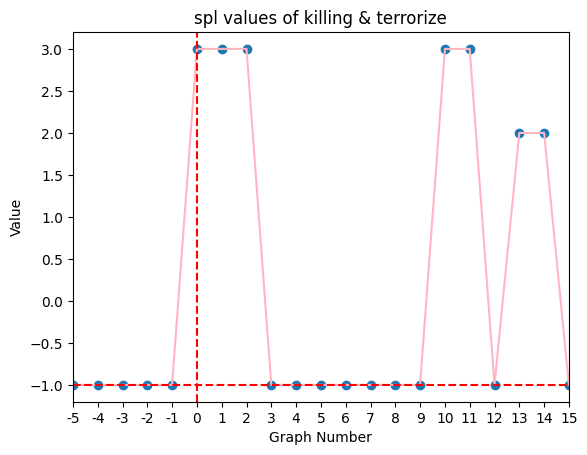

In [23]:
plot_pairs(data_bin_laden["('killing', 'terrorize')"].values,'spl values of killing & terrorize')

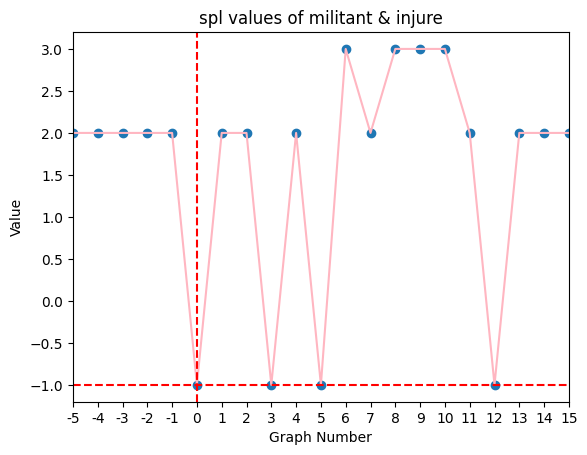

In [24]:
plot_pairs(data_bin_laden["('militant', 'injure')"].values,'spl values of militant & injure')

# Iraq

In [25]:
directory = '/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/iraq_3_20_2003'
# List to store the graphs
graphs_iraq = []
# Iterate over files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    file = pd.read_csv(file_path)
    # Read the graph from the file (assuming CSV format)
    G = nx.from_pandas_edgelist(file, 'source', 'target', 'weight')
    graphs_iraq.append(G)

In [27]:
word_set_iraq=['military','invader','combative','combatant','airbase','airdefense','army','combat','iraq']

In [29]:
dfs_iraq= []
# Iterate over each graph
for i, G in enumerate(graphs_iraq):
    # Create a dictionary to store SPL scores for the current graph
    spl_scores = {(word1, word2): -1 for word1 in word_set_iraq for word2 in word_set_iraq if word1 != word2}
    # Calculate SPL for each pair of words
    for word1 in word_set_iraq:
        for word2 in word_set_iraq:
            if word1 != word2:
                if word1 in G.nodes() and word2 in G.nodes():
                    try:
                        spl = nx.shortest_path_length(G, word1, word2)
                        spl_scores[(word1, word2)] = spl
                    except nx.NetworkXNoPath:
                        continue

    # Create a DataFrame for the graph's SPL scores
    df_graph = pd.DataFrame([spl_scores], columns=['Graph'] + list(spl_scores.keys()))
    df_graph['Graph'] = f'Graph {i+1}'

    # Append the graph's DataFrame to the list
    dfs_iraq.append(df_graph)

# Concatenate all graph-specific DataFrames into a single DataFrame
dfs_iraq = pd.concat(dfs_iraq, ignore_index=True)

# Save the DataFrame to a CSV file
dfs_iraq.to_csv('/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/spl_scores_iraq.csv', index=False)

In [30]:
data_iraq = pd.read_csv('/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/spl_scores_iraq.csv')

In [31]:
def plot_pairs_iraq(values,title):
   # Set the x-axis values as a range of integers
    x = range(-5, 14)
    # Get the values from the column "('crash', 'traveler')"
    # Plot the values as a scatter plot
    plt.scatter(x, values, color='lightblue')
    # Plot a line connecting the scatter plot points
    plt.plot(x, values, linestyle='-', color='lightpink')

    plt.title(title)
    plt.xlabel("Graph Number")
    plt.ylabel("Value")

    # Set the x-axis ticks and labels
    plt.xticks(range(-5, 14))
    plt.xlim(-5, 13)  # Set the x-axis limits

    # Add a horizontal line at y = -1
    plt.axhline(y=-1, color='red', linestyle='--')
    # Add a vertical line at x = 0
    plt.axvline(x=0, color='red', linestyle='--')

    # Display the plot
    plt.show()

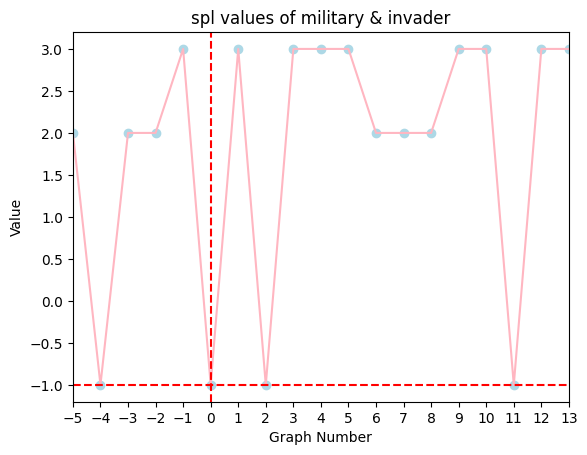

In [32]:
plot_pairs_iraq(data_iraq["('military', 'invader')"].values,'spl values of military & invader')

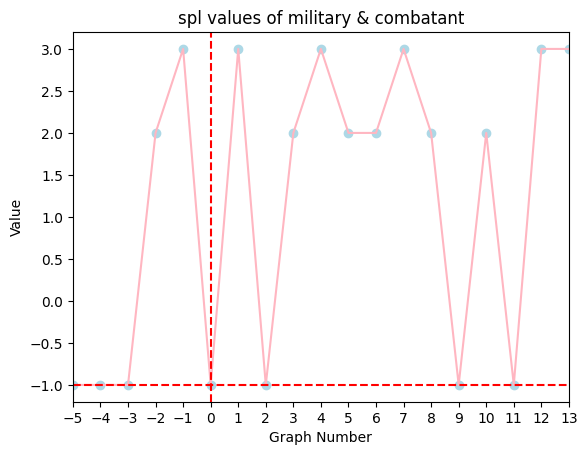

In [33]:
plot_pairs_iraq(data_iraq["('military', 'combatant')"].values,'spl values of military & combatant')

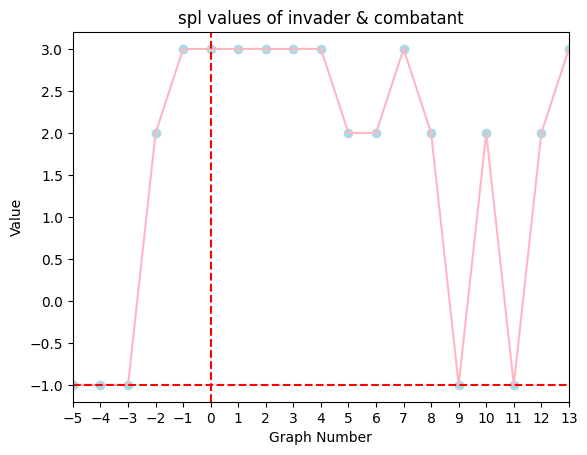

In [34]:
plot_pairs_iraq(data_iraq["('invader', 'combatant')"].values,'spl values of invader & combatant')

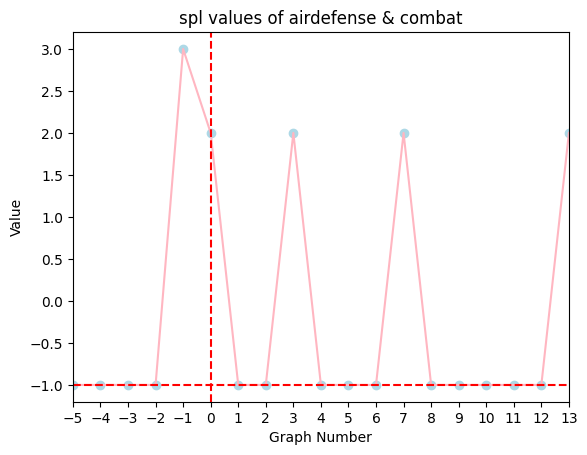

In [35]:
plot_pairs_iraq(data_iraq["('airdefense', 'combat')"].values,'spl values of airdefense & combat')

# Katrina

In [36]:
directory = '/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/katrina_08_2005'
# List to store the graphs
graphs_katrina = []
# Iterate over files in the directory
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    file = pd.read_csv(file_path)
    # Read the graph from the file (assuming CSV format)
    G = nx.from_pandas_edgelist(file, 'source', 'target', 'weight')
    graphs_katrina.append(G)

In [37]:
word_set_katrina=['mileanhourwinds','wind','thunderstorm','storm','hurricanehit','hurricaneravaged',
                  'damage','airwave','loss','floodwater','floodwall','destroy','shelter']

In [39]:
dfs_katrina= []
# Iterate over each graph
for i, G in enumerate(graphs_iraq):
    # Create a dictionary to store SPL scores for the current graph
    spl_scores = {(word1, word2): -1 for word1 in word_set_katrina for word2 in word_set_katrina if word1 != word2}
    # Calculate SPL for each pair of words
    for word1 in word_set_katrina:
        for word2 in word_set_katrina:
            if word1 != word2:
                if word1 in G.nodes() and word2 in G.nodes():
                    try:
                        spl = nx.shortest_path_length(G, word1, word2)
                        spl_scores[(word1, word2)] = spl
                    except nx.NetworkXNoPath:
                        continue

    # Create a DataFrame for the graph's SPL scores
    df_graph = pd.DataFrame([spl_scores], columns=['Graph'] + list(spl_scores.keys()))
    df_graph['Graph'] = f'Graph {i+1}'

    # Append the graph's DataFrame to the list
    dfs_katrina.append(df_graph)

# Concatenate all graph-specific DataFrames into a single DataFrame
dfs_katrina = pd.concat(dfs_katrina, ignore_index=True)

# Save the DataFrame to a CSV file
dfs_katrina.to_csv('/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/spl_scores_katrina.csv', index=False)

In [40]:
data_katrina = pd.read_csv('/Users/ofrihefetz/PycharmProjects/karpad_fp_spl/spl_scores_katrina.csv')

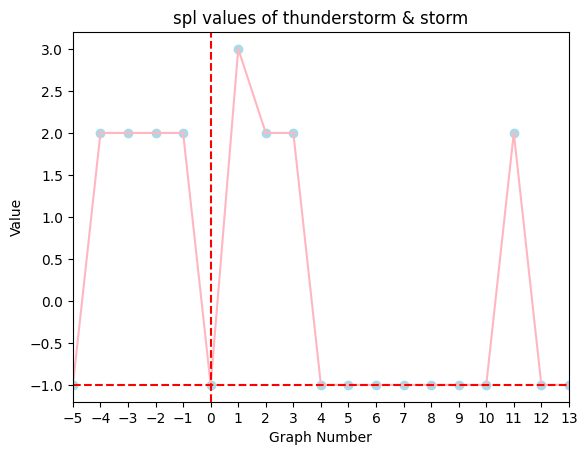

In [41]:
plot_pairs_iraq(data_katrina["('thunderstorm', 'storm')"].values,'spl values of thunderstorm & storm')

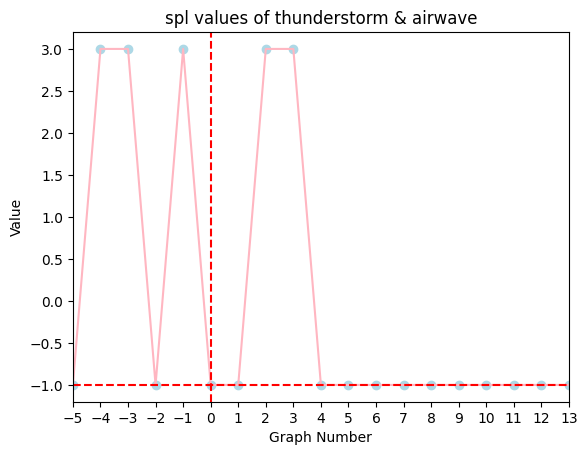

In [42]:
plot_pairs_iraq(data_katrina["('thunderstorm', 'airwave')"].values,'spl values of thunderstorm & airwave')

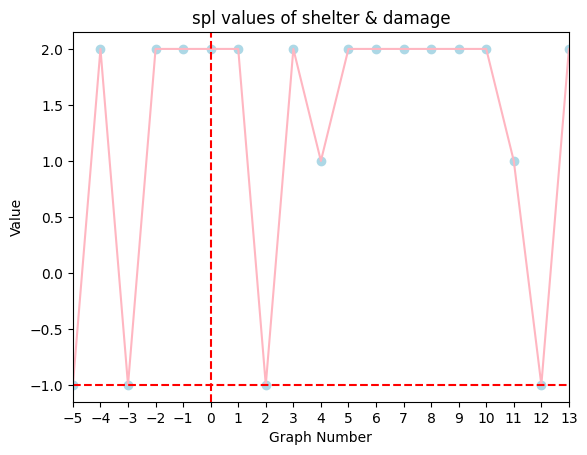

In [43]:
plot_pairs_iraq(data_katrina["('shelter', 'damage')"].values,'spl values of shelter & damage')

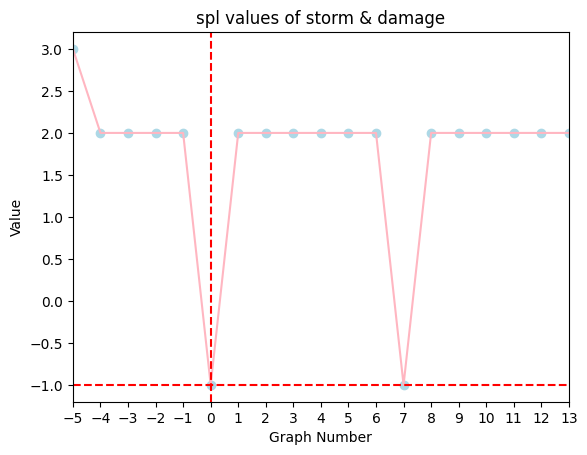

In [44]:
plot_pairs_iraq(data_katrina["('storm', 'damage')"].values,'spl values of storm & damage')